# Table of Contents
* [0. Set-up](#Set-up)

* [1. Getting the Data](#1.-Getting-the-Data)
    * [1.1 Data Scraping](#1.1-Data-Scraping)
    * [1.2 Data Cleaning](#1.2-Data-Cleaning)
    
* [2. Clustering](#2.-Clustering)

# 0.  Set-up

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')
%matplotlib inline
import sys, re, csv
from bs4 import BeautifulSoup
import urllib, urllib2, time
from urllib2 import Request, urlopen, URLError, HTTPError
from urlparse import urlparse
import cPickle as pickle
from ParseDataByLeague import ParsePlyrDataById
sys.path.insert(1,'/Users/zyzdiana/GitHub/AC299r/code')

# 1. Getting the Data

## 1.1 Data Scraping

In [3]:
# Get urls for every team roaster
request = Request("http://www.espn.com/nba/players")
response = urlopen(request)
the_page = response.read()
pool = BeautifulSoup(the_page,'html.parser')
teams_a = pool.findAll('a')[:60]
team_urls = {}
for i in xrange(0,30):
    team = teams_a[i*2]['href'].split('/')
    team_urls[teams_a[i*2+1].contents[0]] = 'http://www.espn.com/nba/team/roster/_/name/%s/%s' % (team[-2],team[-1])
pickle.dump(team_urls,open('pickled_files/team_urls.p','wb'))

In [4]:
players_by_team = {}
player_to_id = {}
id_to_player = {}
count = 0
for team, url in team_urls.iteritems():
    # Get players for each team
    request = Request(url)
    response = urlopen(request)
    the_page = response.read()
    pool = BeautifulSoup(the_page,'html.parser')

    players_by_team[team] = {}
    for a in pool.findAll('a', href=True):
        if 'http://www.espn.com/nba/player/_/id/' in a['href']:
            player_name = a.contents[0]
            player_id = a['href'].split('/')[-2]
            players_by_team[team][player_name] = player_id
            player_to_id[player_name] = player_id
            id_to_player[player_id] = player_name
            count += 1
print "Scraped %s players" % count
pickle.dump(players_by_team,open('pickled_files/players_by_team.p','wb'))
pickle.dump(player_to_id,open('pickled_files/player_to_id.p','wb'))
pickle.dump(id_to_player,open('pickled_files/id_to_player.p','wb'))

Scraped 496 players


In [6]:
team_urls = pickle.load(open('pickled_files/team_urls.p','rb'))
print(team_urls.keys())

players_by_team = pickle.load(open('pickled_files/players_by_team.p','rb'))
player_to_id = pickle.load(open('pickled_files/player_to_id.p','rb'))
id_to_player = pickle.load(open('pickled_files/id_to_player.p','rb'))

[u'New York Knicks', u'Los Angeles Lakers', u'Memphis Grizzlies', u'San Antonio Spurs', u'New Orleans Pelicans', u'Houston Rockets', u'Detroit Pistons', u'Boston Celtics', u'Miami Heat', u'Orlando Magic', u'Portland Trail Blazers', u'Golden State Warriors', u'Chicago Bulls', u'Washington Wizards', u'Dallas Mavericks', u'Sacramento Kings', u'Oklahoma City Thunder', u'Charlotte Hornets', u'Milwaukee Bucks', u'LA Clippers', u'Toronto Raptors', u'Utah Jazz', u'Phoenix Suns', u'Minnesota Timberwolves', u'Philadelphia 76ers', u'Cleveland Cavaliers', u'Atlanta Hawks', u'Brooklyn Nets', u'Indiana Pacers', u'Denver Nuggets']


In [7]:
league = 'nba'
year = 2012
hasData = []
for team, players in players_by_team.iteritems():
    print "*********************************", team, "*********************************"
    for player, plyr_id in players.iteritems():
        hasData.append(ParsePlyrDataById(league,int(plyr_id),year))

********************************* New York Knicks *********************************
Parsing data:

	Player Name	: Ramon Sessions
	League		: NBA
	Team		: New York Knicks
	Year		: 2012
101
Success! 22
22
There were 64 games!
Parsing data:

	Player Name	: Ron Baker
	League		: NBA
	Team		: New York Knicks
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Luke Kornet
	League		: NBA
	Team		: New York Knicks
	Year		: 2012
2
Only 2 Games available, skipping player.
Parsing data:

	Player Name	: Enes Kanter
	League		: NBA
	Team		: New York Knicks
	Year		: 2012
93
Success! 13
13
There were 66 games!
Parsing data:

	Player Name	: Kyle O'Quinn
	League		: NBA
	Team		: New York Knicks
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Lance Thomas
	League		: NBA
	Team		: New York Knicks
	Year		: 2012
60
Success! 3
3
There were 45 games!
Parsing data:

	Player Name	: Joakim Noah
	League		: NBA
	Team		: New York Knicks
	Year		: 2

Parsing data:

	Player Name	: Tony Parker
	League		: NBA
	Team		: San Antonio Spurs
	Year		: 2012
105
Success! 25
25
There were 66 games!
Parsing data:

	Player Name	: Rudy Gay
	League		: NBA
	Team		: San Antonio Spurs
	Year		: 2012
96
Success! 16
16
There were 66 games!
Parsing data:

	Player Name	: Dejounte Murray
	League		: NBA
	Team		: San Antonio Spurs
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Patty Mills
	League		: NBA
	Team		: San Antonio Spurs
	Year		: 2012
54
Success! 25
25
There were 21 games!
Parsing data:

	Player Name	: Kawhi Leonard
	League		: NBA
	Team		: San Antonio Spurs
	Year		: 2012
105
Success! 25
25
There were 66 games!
Parsing data:

	Player Name	: Derrick White
	League		: NBA
	Team		: San Antonio Spurs
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: LaMarcus Aldridge
	League		: NBA
	Team		: San Antonio Spurs
	Year		: 2012
83
Success! 3
3
There were 66 games!
Parsing data:

	Player

Parsing data:

	Player Name	: Dwight Buycks
	League		: NBA
	Team		: Detroit Pistons
	Year		: 2012
3
Only 3 Games available, skipping player.
Parsing data:

	Player Name	: Henry Ellenson
	League		: NBA
	Team		: Detroit Pistons
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Anthony Tolliver
	League		: NBA
	Team		: Detroit Pistons
	Year		: 2012
83
Success! 3
3
There were 66 games!
Parsing data:

	Player Name	: Avery Bradley
	League		: NBA
	Team		: Detroit Pistons
	Year		: 2012
111
Success! 31
31
There were 66 games!
********************************* Boston Celtics *********************************
Parsing data:

	Player Name	: Semi Ojeleye
	League		: NBA
	Team		: Boston Celtics
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Jayson Tatum
	League		: NBA
	Team		: Boston Celtics
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Gordon Hayward
	League		: NBA
	Team		: Boston Celt

Parsing data:

	Player Name	: CJ Wilcox
	League		: NBA
	Team		: Portland Trail Blazers
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Evan Turner
	League		: NBA
	Team		: Portland Trail Blazers
	Year		: 2012
103
Success! 23
23
There were 66 games!
Parsing data:

	Player Name	: CJ McCollum
	League		: NBA
	Team		: Portland Trail Blazers
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Jusuf Nurkic
	League		: NBA
	Team		: Portland Trail Blazers
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Pat Connaughton
	League		: NBA
	Team		: Portland Trail Blazers
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Maurice Harkless
	League		: NBA
	Team		: Portland Trail Blazers
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Wade Baldwin
	League		: NBA
	Team		: Portland Trail Blazers
	Year		: 2012
5
Only 5 Games 

Parsing data:

	Player Name	: Ian Mahinmi
	League		: NBA
	Team		: Washington Wizards
	Year		: 2012
93
Success! 13
13
There were 66 games!
Parsing data:

	Player Name	: Otto Porter
	League		: NBA
	Team		: Washington Wizards
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Marcin Gortat
	League		: NBA
	Team		: Washington Wizards
	Year		: 2012
83
Success! 3
3
There were 66 games!
Parsing data:

	Player Name	: Kelly Oubre
	League		: NBA
	Team		: Washington Wizards
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Devin Robinson
	League		: NBA
	Team		: Washington Wizards
	Year		: 2012
2
Only 2 Games available, skipping player.
Parsing data:

	Player Name	: Jason Smith
	League		: NBA
	Team		: Washington Wizards
	Year		: 2012
83
Success! 3
3
There were 66 games!
********************************* Dallas Mavericks *********************************
Parsing data:

	Player Name	: Jeff Withey
	League		: NBA
	Team		: Dallas M

Parsing data:

	Player Name	: Frank Kaminsky
	League		: NBA
	Team		: Charlotte Hornets
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Nicolas Batum
	League		: NBA
	Team		: Charlotte Hornets
	Year		: 2012
83
Success! 3
3
There were 66 games!
Parsing data:

	Player Name	: Dwayne Bacon
	League		: NBA
	Team		: Charlotte Hornets
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Dwight Howard
	League		: NBA
	Team		: Charlotte Hornets
	Year		: 2012
91
Success! 11
11
There were 66 games!
Parsing data:

	Player Name	: Johnny O'Bryant
	League		: NBA
	Team		: Charlotte Hornets
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Cody Zeller
	League		: NBA
	Team		: Charlotte Hornets
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Kemba Walker
	League		: NBA
	Team		: Charlotte Hornets
	Year		: 2012
83
Success! 3
3
There were 66 games!
Parsing data:

	

Parsing data:

	Player Name	: Bruno Caboclo
	League		: NBA
	Team		: Toronto Raptors
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Pascal Siakam
	League		: NBA
	Team		: Toronto Raptors
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Alfonzo McKinnie
	League		: NBA
	Team		: Toronto Raptors
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Jonas Valanciunas
	League		: NBA
	Team		: Toronto Raptors
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: OG Anunoby
	League		: NBA
	Team		: Toronto Raptors
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: CJ Miles
	League		: NBA
	Team		: Toronto Raptors
	Year		: 2012
90
Success! 10
10
There were 66 games!
Parsing data:

	Player Name	: Kyle Lowry
	League		: NBA
	Team		: Toronto Raptors
	Year		: 2012
83
Success! 3
3
There were 66 games!
Parsing data:

	Player Name

Parsing data:

	Player Name	: Ben Simmons
	League		: NBA
	Team		: Philadelphia 76ers
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Jacob Pullen
	League		: NBA
	Team		: Philadelphia 76ers
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Justin Anderson
	League		: NBA
	Team		: Philadelphia 76ers
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: James Michael
	League		: NBA
	Team		: Philadelphia 76ers
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Trevor Booker
	League		: NBA
	Team		: Philadelphia 76ers
	Year		: 2012
81
Success! 3
3
There were 66 games!
Parsing data:

	Player Name	: JJ Redick
	League		: NBA
	Team		: Philadelphia 76ers
	Year		: 2012
94
Success! 14
14
There were 66 games!
Parsing data:

	Player Name	: Richaun Holmes
	League		: NBA
	Team		: Philadelphia 76ers
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsin

Parsing data:

	Player Name	: Quincy Acy
	League		: NBA
	Team		: Brooklyn Nets
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Caris LeVert
	League		: NBA
	Team		: Brooklyn Nets
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Timofey Mozgov
	League		: NBA
	Team		: Brooklyn Nets
	Year		: 2012
96
Success! 16
16
There were 66 games!
Parsing data:

	Player Name	: Isaiah Whitehead
	League		: NBA
	Team		: Brooklyn Nets
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Allen Crabbe
	League		: NBA
	Team		: Brooklyn Nets
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: D'Angelo Russell
	League		: NBA
	Team		: Brooklyn Nets
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: Jacob Wiley
	League		: NBA
	Team		: Brooklyn Nets
	Year		: 2012
5
Only 5 Games available, skipping player.
Parsing data:

	Player Name	: J

In [128]:
league = 'nba'
hasData = []
# plyr_id = player_to_id['LeBron James']
plyr_id = 110 # Kobe
plyr_id = 215 # Duncan
for year in range(1996,2016):
#     for team, players in players_by_team.iteritems():
#         print "*********************************", team, "*********************************"
#         for player, plyr_id in players.iteritems():
    hasData.append(ParsePlyrDataById(league,int(plyr_id),year))

Parsing data:

	Player Name	: Tim Duncan
	League		: NBA
	Team		: ESPN
	Year		: 1996
3
Only 3 Games available, skipping player.
Parsing data:

	Player Name	: Tim Duncan
	League		: NBA
	Team		: ESPN
	Year		: 1997
3
Only 3 Games available, skipping player.
Parsing data:

	Player Name	: Tim Duncan
	League		: NBA
	Team		: ESPN
	Year		: 1998
117
Success! 17
17
There were 82 games!
Parsing data:

	Player Name	: Tim Duncan
	League		: NBA
	Team		: ESPN
	Year		: 1999
89
Success! 27
27
There were 50 games!
Parsing data:

	Player Name	: Tim Duncan
	League		: NBA
	Team		: ESPN
	Year		: 2000
104
Success! 7
7
There were 81 games!
Parsing data:

	Player Name	: Tim Duncan
	League		: NBA
	Team		: ESPN
	Year		: 2001
121
Success! 21
21
There were 82 games!
Parsing data:

	Player Name	: Tim Duncan
	League		: NBA
	Team		: ESPN
	Year		: 2002
118
Success! 18
18
There were 82 games!
Parsing data:

	Player Name	: Tim Duncan
	League		: NBA
	Team		: ESPN
	Year		: 2003
133
Success! 34
34
There were 81 games!
Parsi

## 1.2 Data Cleaning

In [8]:
def clean_dir(ls):
    if '.DS_Store' in ls:
        ls.remove('.DS_Store')
        return ls
    else:
        return ls

In [8]:
file_ls = clean_dir(os.listdir('./data/'))
# df = pd.read_csv('data/%s' % file_ls[0])
df = pd.read_csv('data/NBA_Stephen_Curry_2016.csv')

In [9]:
df.head()

,ID,NumDate,StDate,Opp,Score,Res,FGA,FGM,FGP,3PA,...,FTM,FTP,PTS,REB,AST,BLK,STL,PF,TO,MIN
0,3975,20160413,Wed 4/13,MEM,125-104,W,24,15,0.625,19,...,6,1.0,46,4,6,0,2,2,2,30
1,3975,20160410,Sun 4/10,SA,92-86,W,22,13,0.591,9,...,7,1.0,37,5,5,0,2,4,4,35
2,3975,20160409,Sat 4/9,MEM,100-99,W,22,7,0.318,14,...,0,0.0,17,9,8,0,1,1,2,34
3,3975,20160407,Thu 4/7,SA,112-101,W,19,11,0.579,7,...,2,1.0,27,5,9,0,2,2,3,36
4,3975,20160405,Tue 4/5,MIN,117-124,L,25,7,0.280,14,...,3,1.0,21,6,15,0,3,4,3,43


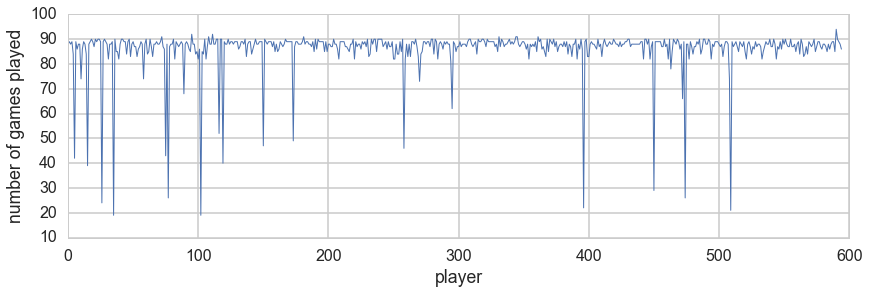

In [10]:
# Get the initial feature array
X_raw = []
for f in file_ls:
    df = pd.read_csv('data/%s' % f)
    xx = df[['ID','FGP','3PP','FTP','PTS','REB','AST','BLK','STL','PF','TO','MIN']].values
    if xx.shape[0] > 10:
        X_raw.append(xx)
        
num_games = [xx.shape[0] for xx in X_raw]

# For each player, take a look at how many games do we have data for
plt.figure(figsize = [14,4])
plt.plot(num_games, lw = 1)
plt.xlabel('player')
plt.ylabel('number of games played')
plt.show()

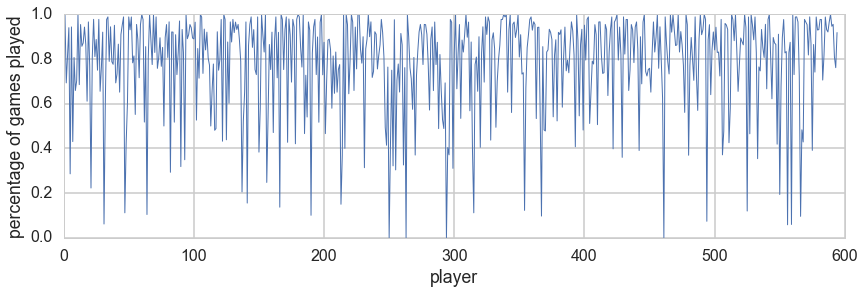

In [11]:
# We are only keeping data for players that have played more than 10% of the total number of games in a season
games_played = []
for xx in X_raw:
    games_played.append(np.sum(xx[:,-1] != 0)*1./xx.shape[0])
    
plt.figure(figsize = [14,4])
plt.plot(games_played, lw = 1)
plt.xlabel('player')
plt.ylabel('percentage of games played')
plt.show()

In [12]:
# We are only keeping data for players that have played more than 10% of the total number of games in a season
idx_ls = np.where(np.array(games_played) < 0.1)[0]
for i in reversed(idx_ls):
    X_raw.pop(i)

In [21]:
features = ['ID','NUM_GM','FGP','3PP','FTP','PTS','REB','AST','BLK','STL','PF','TO','MIN']
X = np.empty([len(X_raw), len(features)])
for idx, xx in enumerate(X_raw):
    X[idx,0] = xx[0,0]
    X[idx,1] = xx.shape[0]
    X[idx,2:] = np.average(xx[:,1:], axis = 0)

In [22]:
# create a few dictionaries to convert between the name of the statistics to idx in feature array
feature_to_idx = {}
idx_to_feature = {}
for idx, feature in enumerate(features[1:]):
    feature_to_idx[feature] = idx
    idx_to_feature[idx] = feature

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(np.array(X[:,1:]))
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

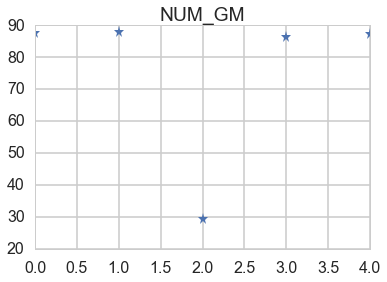

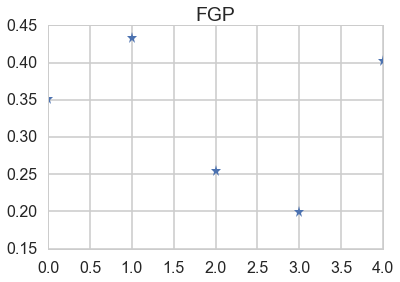

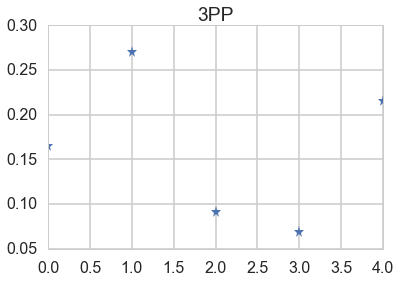

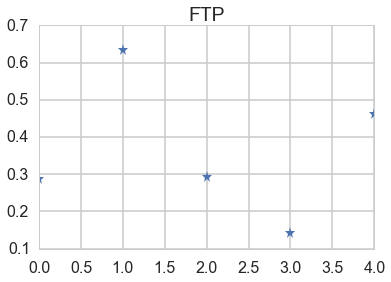

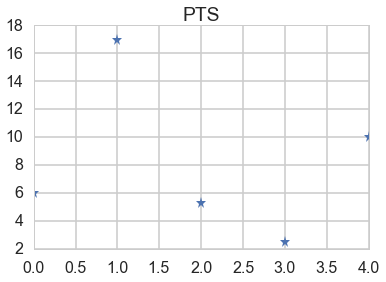

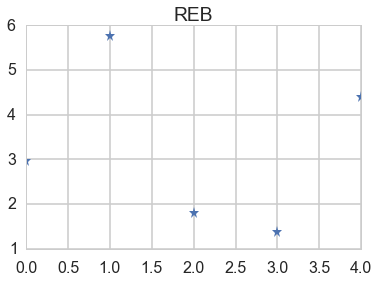

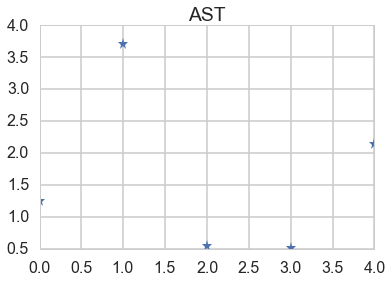

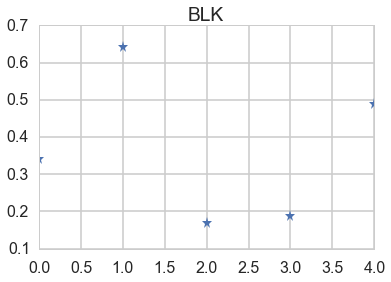

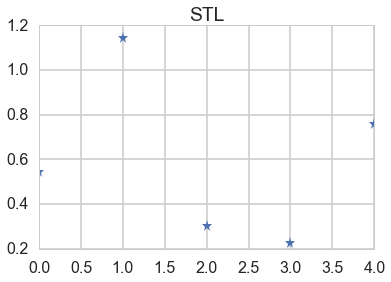

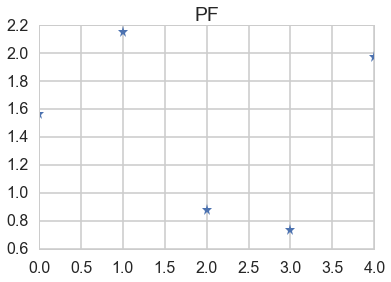

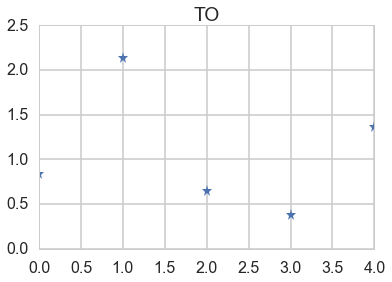

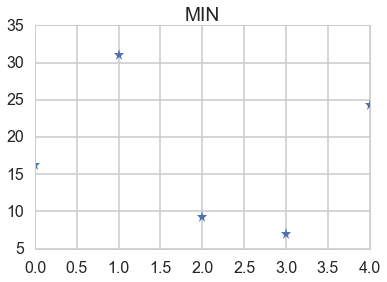

In [30]:
for i in xrange(cluster_centers.shape[1]):
    plt.plot(cluster_centers[:,i], '*')
    plt.title(features[i+1])
    plt.show()

In [54]:
df_stats = pd.DataFrame(data = X[:,1:], columns = features[1:])
df_stats.head()

,NUM_GM,FGP,3PP,FTP,PTS,REB,AST,BLK,STL,PF,TO,MIN
0,90.0,0.318578,0.257644,0.253344,6.366667,1.322222,2.233333,0.122222,0.411111,1.666667,1.077778,14.066667
1,84.0,0.422512,0.222190,0.415750,8.702381,6.130952,1.535714,0.666667,0.738095,1.880952,0.821429,22.523810
2,88.0,0.199875,0.053034,0.088068,1.704545,1.420455,0.340909,0.147727,0.193182,1.068182,0.465909,6.352273
3,86.0,0.409733,0.334337,0.482116,10.197674,6.011628,1.662791,0.662791,0.860465,2.093023,1.511628,28.302326
4,89.0,0.510652,0.327449,0.452438,14.887640,7.191011,3.134831,1.438202,0.820225,1.943820,1.314607,31.292135


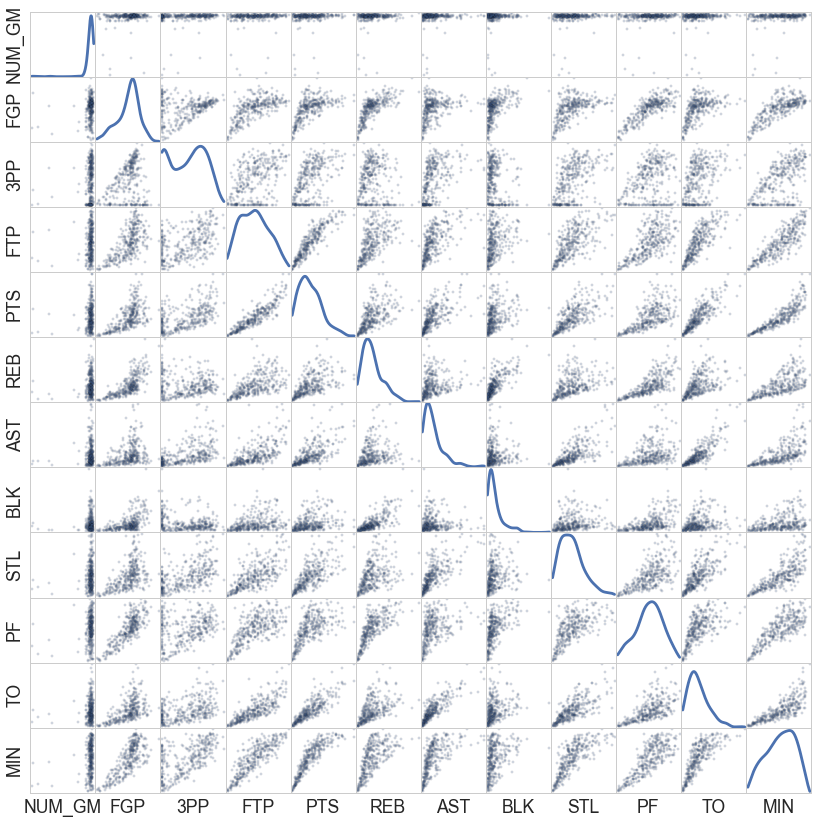

In [32]:
axs = pd.tools.plotting.scatter_matrix(df_stats, alpha=0.2, figsize=(14, 14), diagonal='kde'); #the diagonal will show kernel density
[ax.set_yticks([]) for ax in axs[:,0]] #turn off the ticks that take up way too much space in such a crammed figure
[ax.set_xticks([]) for ax in axs[-1,:]];

## HMM on player shooting data

In [14]:
from EM import RunEM

SyntaxError: invalid syntax (EM.py, line 285)

In [27]:
file_ls = clean_dir(os.listdir('./data/'))
df = pd.read_csv('data/NBA_Stephen_Curry_2016.csv')
df.head()

,ID,NumDate,StDate,Opp,Score,Res,FGA,FGM,FGP,3PA,...,FTM,FTP,PTS,REB,AST,BLK,STL,PF,TO,MIN
0,3975,20160413,Wed 4/13,MEM,125-104,W,24,15,0.625,19,...,6,1.0,46,4,6,0,2,2,2,30
1,3975,20160410,Sun 4/10,SA,92-86,W,22,13,0.591,9,...,7,1.0,37,5,5,0,2,4,4,35
2,3975,20160409,Sat 4/9,MEM,100-99,W,22,7,0.318,14,...,0,0.0,17,9,8,0,1,1,2,34
3,3975,20160407,Thu 4/7,SA,112-101,W,19,11,0.579,7,...,2,1.0,27,5,9,0,2,2,3,36
4,3975,20160405,Tue 4/5,MIN,117-124,L,25,7,0.280,14,...,3,1.0,21,6,15,0,3,4,3,43


In [21]:
player_data = []
column = 'FGM'
for year in range(2012,2017):
    df = pd.read_csv('data/NBA_Stephen_Curry_%s.csv' % year)
    player_data.append(df[column].values)

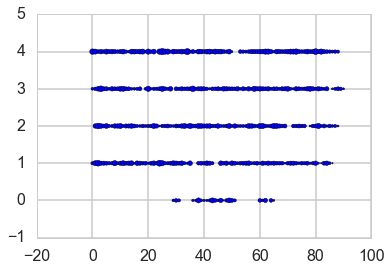

In [37]:
for i in range(5):
    plt.scatter(range(len(player_data[i])),np.ones(len(player_data[i]))*i,s = player_data[i]*2)
    

In [28]:
def Run_HMM(player_id = None, year = 2016):
    player = id_to_player[player_id]
    df = pd.read_csv('data/NBA_%s_%s.csv' % (('_').join(player.split(' ')), year))
    Y_FG = df.FGM.values.reshape([1,-1])
    Y_3P = df['3PM'].values.reshape([1,-1])
    Y_FT = df.FTM.values.reshape([1,-1])
    p_FG, pp_FG, pll_FG, pul_FG, sigma2e_FG, x_post, sigma2_post = RunEM(Y_FG, binomialN = df.FGA.values)
    p_3P, pp_3P, pll_3P, pul_3P, sigma2e_3P, x_post, sigma2_post = RunEM(Y_3P, binomialN = df['3PA'].values)
    p_FT, pp_FT, pll_FT, pul_FT, sigma2e_FT, x_post, sigma2_post = RunEM(Y_FT, binomialN = df.FTA.values)

    player = id_to_player[str(df['ID'][0])]
    plt.figure(figsize = (14,5))
    plt.subplot(1, 3, 1)
    plt.plot(pll_FG[1:], 'g--')
    plt.plot(pul_FG[1:],'g--')
    plt.plot(p_FG[1:], 'g')
    plt.title('Field Goal, %s' % player)
    plt.xlabel('Number of Games')
    plt.ylabel('Probability')
    plt.subplot(1, 3, 2)
    plt.plot(pll_3P[1:], 'g--')
    plt.plot(pul_3P[1:],'g--')
    plt.plot(p_3P[1:], 'g')
    plt.title('Three Point, %s' % player)
    plt.xlabel('Number of Games')
    plt.ylabel('Probability')
    plt.subplot(1, 3, 3)
    plt.plot(pll_FT[1:], 'g--')
    plt.plot(pul_FT[1:],'g--')
    plt.plot(p_FT[1:], 'g')
    plt.title('Free Throw, %s' % player)
    plt.xlabel('Number of Games')
    plt.ylabel('Probability')
    plt.tight_layout()
    plt.show()

In [29]:
year = 2016
player = 'LeBron James'
player_id = player_to_id[player]
Run_HMM(player_id, year)

NameError: name 'player_to_id' is not defined

initial sigma2e is 0.25

Converged after 104 iterations
sigma2e is  0.000381309635199
runtime: 1.22314882278 seconds
initial sigma2e is 0.25

Converged after 134 iterations
sigma2e is  0.000619517720504
runtime: 1.85501790047 seconds
initial sigma2e is 0.25

Converged after 124 iterations
sigma2e is  0.135082790868
runtime: 1.54964613914 seconds


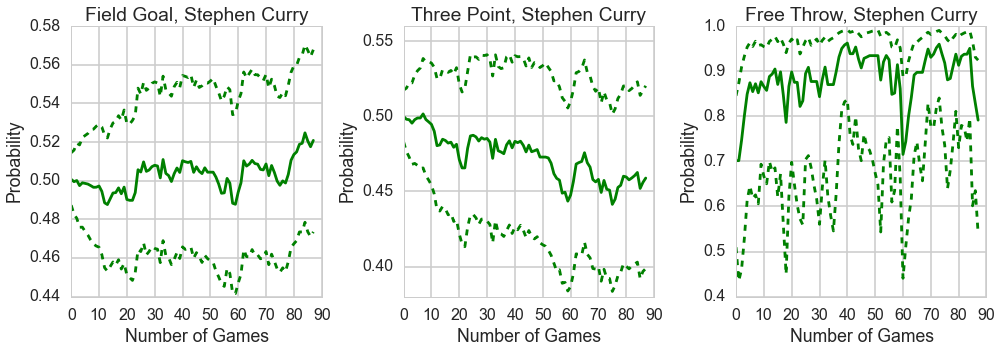

In [185]:
year = 2016
player = 'Stephen Curry'
player_id = player_to_id[player]
Run_HMM(player_id, year)

initial sigma2e is 0.25

Converged after 90 iterations
sigma2e is  0.000374712947974
runtime: 1.15125799179 seconds
initial sigma2e is 0.25

Converged after 129 iterations
sigma2e is  0.00398927101737
runtime: 1.67247891426 seconds
initial sigma2e is 0.25

Converged after 101 iterations
sigma2e is  0.0870620870918
runtime: 1.23681783676 seconds


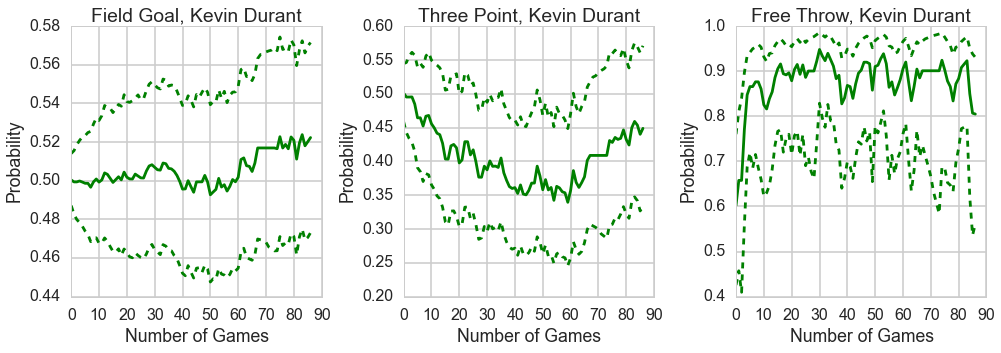

In [186]:
year = 2016
player = 'Kevin Durant'
player_id = player_to_id[player]
Run_HMM(player_id, year)

initial sigma2e is 0.25

Converged after 233 iterations
sigma2e is  0.00209143546524
runtime: 2.07400298119 seconds
initial sigma2e is 0.25

Converged after 163 iterations
sigma2e is  0.0104766619802
runtime: 1.64199900627 seconds
initial sigma2e is 0.25

Converged after 132 iterations
sigma2e is  0.0815334536934
runtime: 1.31541895866 seconds


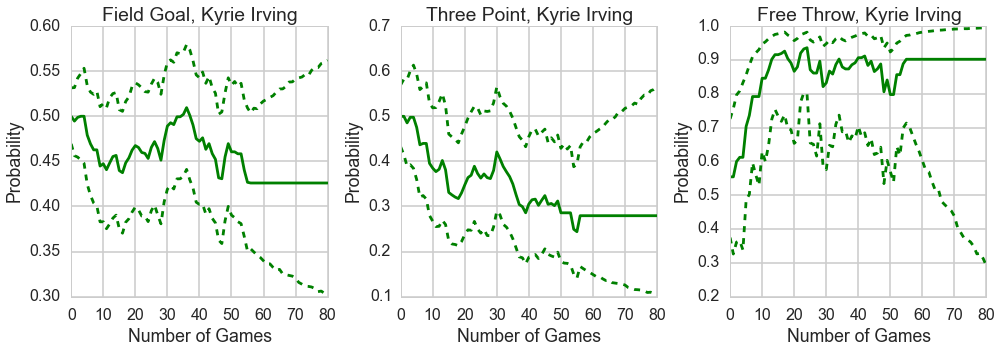

In [187]:
year = 2016
player = 'Kyrie Irving'
player_id = player_to_id[player]
Run_HMM(player_id, year)

In [188]:
df = pd.read_csv('data/NBA_Stephen_Curry_2016.csv')
Y_FG = df.FGM.values.reshape([1,-1])
Y_3P = df['3PM'].values.reshape([1,-1])
Y_FT = df.FTM.values.reshape([1,-1])
p_FG, pp_FG, pll_FG, pul_FG, sigma2e_FG, x_post_FG, sigma2_post_FG = RunEM(Y_FG, binomialN = df.FGA.values)
p_3P, pp_3P, pll_3P, pul_3P, sigma2e_3P, x_post_3P, sigma2_post_3P = RunEM(Y_3P, binomialN = df['3PA'].values)
p_FT, pp_FT, pll_FT, pul_FT, sigma2e_FT, x_post_FT, sigma2_post_FT = RunEM(Y_FT, binomialN = df.FTA.values)

initial sigma2e is 0.25

Converged after 104 iterations
sigma2e is  0.000381309635199
runtime: 1.404047966 seconds
initial sigma2e is 0.25

Converged after 134 iterations
sigma2e is  0.000619517720504
runtime: 1.71615791321 seconds
initial sigma2e is 0.25

Converged after 124 iterations
sigma2e is  0.135082790868
runtime: 1.60601902008 seconds


In [17]:
df = pd.read_csv('data/NBA_Stephen_Curry_2016.csv')

# “outliers” and “normal players”

In [98]:
df_score = pd.read_csv('/Users/zyzdiana/Downloads/NBA-2016-2017-Player-BoxScore-Dataset.csv')
df_score.head()

,DATA SET,DATE,PLAYER FULL NAME,POSITION,OWN TEAM,OPP TEAM,VENUE (R/H),MIN,FG,FGA,...,FTA,OR,DR,TOT,A,PF,ST,TO,BL,PTS
0,2016-2017 Regular Season,10/25/2016,Carmelo Anthony,SF,New York,Cleveland,R,30.1,8,18,...,2,1,4,5,3,5,1,4,0,19
1,2016-2017 Regular Season,10/25/2016,Kristaps Porzingis,PF,New York,Cleveland,R,32.8,5,13,...,6,4,3,7,0,5,1,2,2,16
2,2016-2017 Regular Season,10/25/2016,Joakim Noah,C,New York,Cleveland,R,19.5,0,1,...,0,1,5,6,3,1,1,1,0,0
3,2016-2017 Regular Season,10/25/2016,Courtney Lee,SG,New York,Cleveland,R,19.6,0,5,...,0,1,2,3,0,1,0,2,1,0
4,2016-2017 Regular Season,10/25/2016,Derrick Rose,PG,New York,Cleveland,R,29.6,7,17,...,2,2,1,3,1,1,0,4,1,17


In [99]:
df_play = pd.read_csv('/Users/zyzdiana/Downloads/16-17-pbp/[2016-10-25]-0021600003-SAS@GSW.csv')
df_play.head()

,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,...,reason,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description
0,"=""0021600003""",2016-2017 Regular Season,2016-10-25,Kawhi Leonard,LaMarcus Aldridge,Pau Gasol,Kyle Anderson,Tony Parker,Kevin Durant,Draymond Green,...,NaN,NaN,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN
1,"=""0021600003""",2016-2017 Regular Season,2016-10-25,Kawhi Leonard,LaMarcus Aldridge,Pau Gasol,Kyle Anderson,Tony Parker,Kevin Durant,Draymond Green,...,NaN,NaN,NaN,jump ball,NaN,NaN,NaN,NaN,NaN,Jump Ball Pachulia vs. Gasol: Tip to Aldridge
2,"=""0021600003""",2016-2017 Regular Season,2016-10-25,Kawhi Leonard,LaMarcus Aldridge,Pau Gasol,Kyle Anderson,Tony Parker,Kevin Durant,Draymond Green,...,NaN,missed,NaN,Jump Shot,19.0,14.0,188.0,23.6,23.8,MISS Aldridge 19' Jump Shot
3,"=""0021600003""",2016-2017 Regular Season,2016-10-25,Kawhi Leonard,LaMarcus Aldridge,Pau Gasol,Kyle Anderson,Tony Parker,Kevin Durant,Draymond Green,...,NaN,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,Durant REBOUND (Off:0 Def:1)
4,"=""0021600003""",2016-2017 Regular Season,2016-10-25,Kawhi Leonard,LaMarcus Aldridge,Pau Gasol,Kyle Anderson,Tony Parker,Kevin Durant,Draymond Green,...,NaN,missed,NaN,Jump Shot,25.0,-158.0,193.0,9.2,69.7,MISS Green 25' 3PT Jump Shot


In [105]:
df_play.columns

Index([u'game_id', u'data_set', u'date', u'a1', u'a2', u'a3', u'a4', u'a5',
       u'h1', u'h2', u'h3', u'h4', u'h5', u'period', u'away_score',
       u'home_score', u'remaining_time', u'elapsed', u'play_length',
       u'play_id', u'team', u'event_type', u'assist', u'away', u'home',
       u'block', u'entered', u'left', u'num', u'opponent', u'outof', u'player',
       u'points', u'possession', u'reason', u'result', u'steal', u'type',
       u'shot_distance', u'original_x', u'original_y', u'converted_x',
       u'converted_y', u'description'],
      dtype='object')

In [107]:
players_in_game = df_play.player.unique()
print players_in_game

[nan 'Zaza Pachulia' 'LaMarcus Aldridge' 'Kevin Durant' 'Draymond Green'
 'Tony Parker' 'Klay Thompson' 'Pau Gasol' 'Kawhi Leonard' 'Stephen Curry'
 'Kyle Anderson' 'Patty Mills' 'Dewayne Dedmon' 'Jonathon Simmons'
 'Ian Clark' 'David Lee' 'Manu Ginobili' 'David West' 'Shaun Livingston'
 'Andre Iguodala' 'Patrick McCaw' 'Anderson Varejao' 'Nicolas Laprovittola'
 'JaVale McGee' 'Davis Bertans']


In [121]:
df_tmp = df_score[df_score['DATE'] == '10/25/2016']
df_tmp[df_tmp['PLAYER FULL NAME']== players_in_game[16]]

,DATA SET,DATE,PLAYER FULL NAME,POSITION,OWN TEAM,OPP TEAM,VENUE (R/H),MIN,FG,FGA,...,FTA,OR,DR,TOT,A,PF,ST,TO,BL,PTS
55,2016-2017 Regular Season,10/25/2016,Manu Ginobili,SG,San Antonio,Golden State,R,20.9,4,10,...,0,0,5,5,2,1,1,0,0,10


In [100]:
df_play.event_type.value_counts()

rebound            104
miss                96
shot                87
sub                 53
free throw          44
foul                39
turnover            30
timeout             12
end of period        4
start of period      4
violation            2
unknown              1
jump ball            1
Name: event_type, dtype: int64

In [103]:
grouped = df_play.groupby([df_play.team, df_play.event_type]).count()
print grouped.type['GSW']['turnover']
print grouped.type['SAS']['turnover']

16
13
